## US Accidents Exploratory Data Analysis

- Kaggle
-  information about the datasets
- Can use to prevent car accidents 
- Mention that this dataset does not contain New york data 

In [1]:
pip install opendatasets --upgrade --quiet

In [3]:


import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: smarannair
Your Kaggle Key: ··········


100%|██████████| 653M/653M [00:06<00:00, 107MB/s]


In [4]:
data_filename = '/content/us-accidents/US_Accidents_March23.csv'

## Data preparation and cleaninng 

- Load the file using Pandas
- Look at some information about the data and the column
- Fix any missing or incorrect values 

In [5]:
import pandas as pd



In [6]:
df = pd.read_csv(data_filename)

In [7]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [10]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


Percentage of missing values per column

In [11]:
missingpercentage = df.isnull().sum().sort_values(ascending=False)/len(df)

<Axes: >

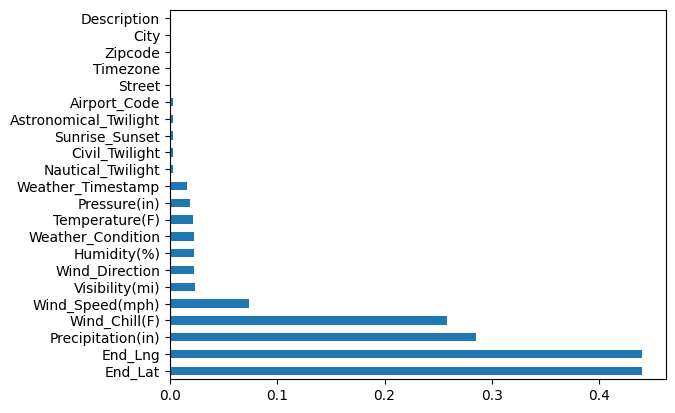

In [12]:
missingpercentage[missingpercentage!=0].plot(kind='barh')

Remove columns that you don't want to use 

## Exploratory Analysis and Visualization 

Columns we will analyze 

1. City
2. Start Time 
3. Start Lat, Start Long
4. Temperature 
5. Weather Condition 


### City

In [13]:
cities = df.City.unique()
len(cities)

13679

In [14]:
cities_by_accident =df.City.value_counts()
cities_by_accident

Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64

In [15]:
cities_by_accident[:20]

Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: City, dtype: int64

In [16]:
'NY' in df.State

False

<Axes: >

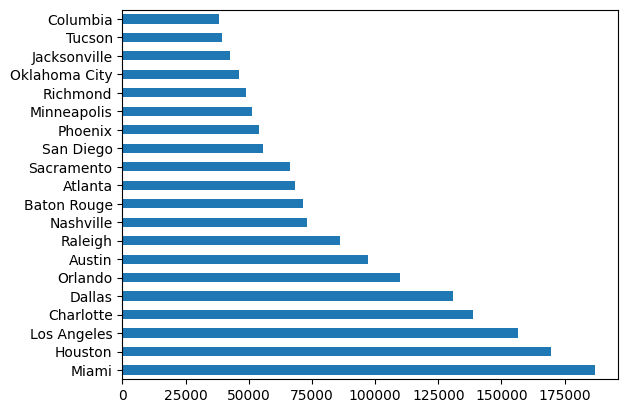

In [17]:
cities_by_accident[:20].plot(kind='barh')

In [18]:
import seaborn as sns 
sns.set_style('darkgrid')


<Axes: xlabel='City', ylabel='Count'>

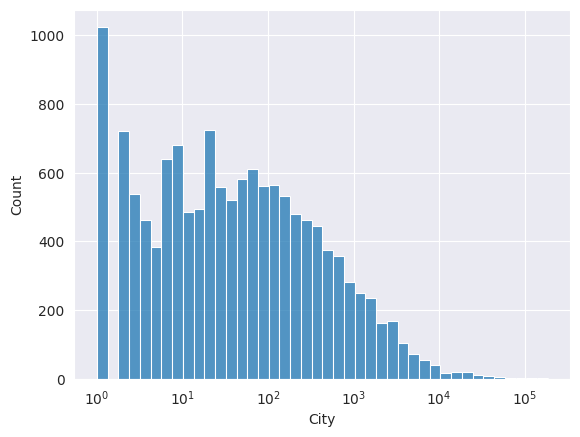

In [19]:
sns.histplot(cities_by_accident,log_scale=True)

In [20]:
cities_by_accident[cities_by_accident==2]

Sublette             2
Hunnewell            2
Waterville Valley    2
Dell City            2
Jolon                2
                    ..
Calipatria           2
Etlan                2
New Bavaria          2
Newark Valley        2
Buckholts            2
Name: City, Length: 722, dtype: int64

### Start time 

In [21]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [22]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [23]:
df.Start_Time

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: datetime64[ns]

<ipython-input-24-dc3c6f7e7f31>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

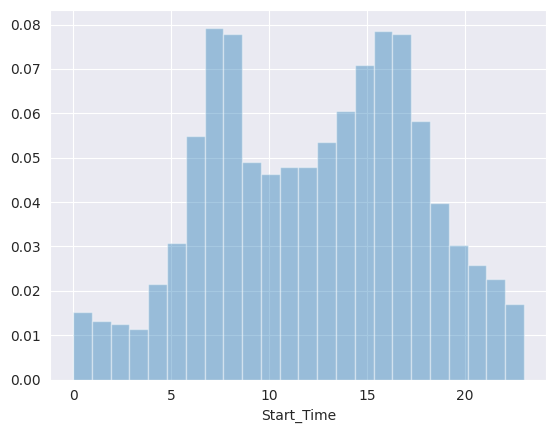

In [24]:
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)

- A high percatage of accidents are happening between 6 to 10 am (Time when people are commuting to work)
- 3 pm to 6 pm seems to be having more accidents

<ipython-input-25-9a42be3cf92c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

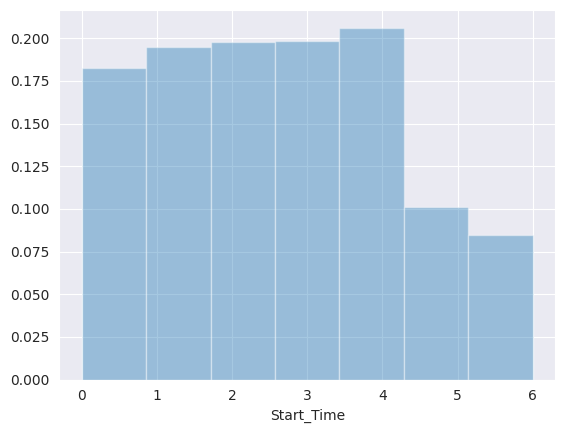

In [25]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)

Is the distribution of accidents by hour the same on weekends as on weekdays 

In [26]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.day_of_week==6]

<ipython-input-27-c6aadacd27ab>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays_start_time.dt.hour,bins=24,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

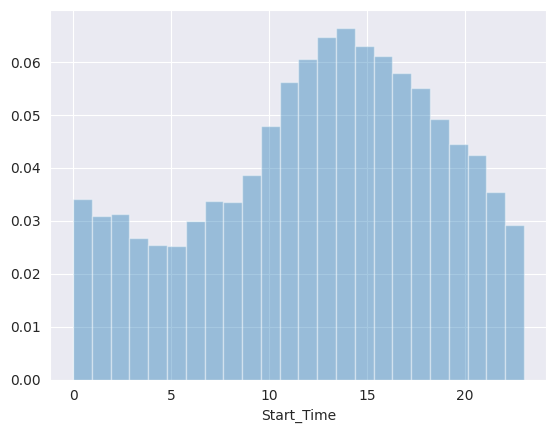

In [27]:
sns.distplot(sundays_start_time.dt.hour,bins=24,kde=False,norm_hist=True)


On Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays 

<ipython-input-28-c9f43ef5a65c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays_start_time.dt.month,bins=12,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

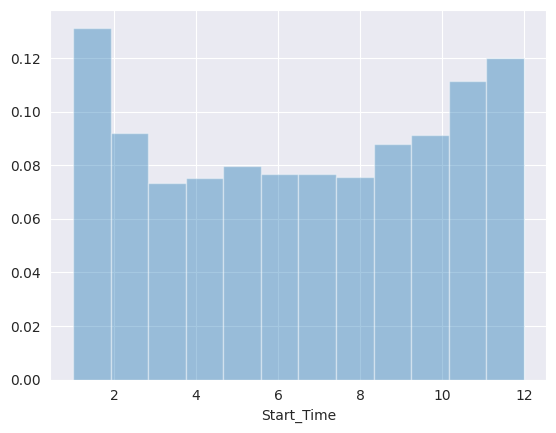

In [28]:

sns.distplot(sundays_start_time.dt.month,bins=12,kde=False,norm_hist=True)


### Start Longitude and Latitude 

In [31]:
sample_df = df.sample(int(0.1*len(df)))

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

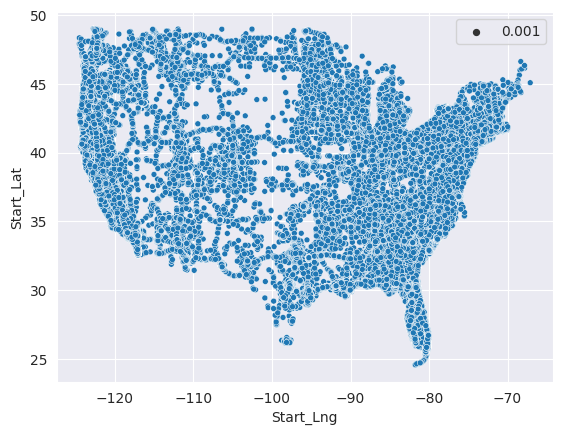

In [34]:
sns.scatterplot(x=df.Start_Lng,y=sample_df.Start_Lat,size=0.001)

In [41]:
import folium
from folium.plugins import HeatMap

In [49]:
sample_df = df.sample(int(0.001*len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

In [50]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

### Summary and Conclusion 

Insights 
 -  No data fron New York
 - The number of accidents per city decreases exponentially 
 - Less than 5% of citiies have more than 1000 yearly accidents 
 - Over 1200 cities have reported just one accident(need to investigate)